In [1]:
import pandas as pd
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt
from numpy import log as ln

### 1. Write a Python code to implement a PCA analysis with the following features.

In [2]:
# a PCA on correlation matrix
def pca(df):
    
    # standardization
    mean = np.mean(df, axis= 0)
    std = np.std(df, axis = 0)
    df_new = (df - mean) / std
    
    # covariance matrix
    cov_m = df_new.cov()
    
    # eigenvalues, eigenvectors
    eigenValues, eigenVectors = np.linalg.eig(cov_m)
        
    return cov_m, eigenValues, eigenVectors

# b Proportion of variance explained by principal components
def prop_var_exp(cov, e_val):
    proportion = e_val / np.trace(cov)
    df = pd.DataFrame({'eigenvalue' : e_val, 'proportion' : proportion} )
    return df

# c Scree plot
def scree_plot(e_val):
    plt.title('Scree Plot of Eigenvalues')
    plt.xlabel('Number')
    plt.plot(e_val, 'o-')
    plt.show()

# d PC score
def pc_scores(df, eigenvalues, eigenvectors):
    
    # standardization
    mean = np.mean(df, axis= 0)
    std = np.std(df, axis = 0)
    df_new = (df - mean) / std

    # Sort the eigenvectors by decreasing eigenvalues
    sorted_idx = np.argsort(eigenvalues)[::-1]
    sorted_eigenvectors = eigenvectors[:, sorted_idx]

    # Transform the data using the sorted eigenvectors
    transformed_data = np.dot(df_new, sorted_eigenvectors)
    
    # Turn it into a DataFrame
    df_pcscore = pd.DataFrame(transformed_data)
    column_name = []
    for i in range(len(df_pcscore.columns)):
        name = "print"+str(i+1)
        column_name.append(name)
    df_pcscore.columns = column_name
    
    # Print the principal component scores
    return df_pcscore

### 2. In the U.S. Navy data set, create new variables by taking the logs of each of the original variables. (If a variable contains zeros, then add '1' to the variable). Use your code in #1 to answer the following questions.

In [3]:
# 데이터 불러오기

navy = pd.read_csv('navy.dat', header = None, delim_whitespace=True)
navy.columns = ['ID','ADO','MAC','WHR','CUA','WNGS','OBC','RMS','MMH']
navy.head()

,ID,ADO,MAC,WHR,CUA,WNGS,OBC,RMS,MMH
0,1,2.0,4.00,4.0,1.26,1,6,6,180.23
1,2,3.0,1.58,40.0,1.25,1,5,5,182.61
2,3,16.6,23.78,40.0,1.00,1,13,13,164.38
3,4,7.0,2.37,168.0,1.00,1,7,8,284.55
4,5,5.3,1.67,42.5,7.79,3,25,25,199.92


In [4]:
# ID column 제외
navy = navy.iloc[:, 1:]

# 데이터 로그변환
log_column = ['ADO', 'MAC', 'WHR', 'WNGS', 'OBC', 'RMS', 'MMH']
log_plus = ['CUA']

navy[log_column] = navy[log_column].apply(lambda x : ln(x))
navy[log_plus] = navy[log_plus].apply(lambda x : ln(x+1))

### a. Perform a principal component analysis on these eight new variables. (PCA on correlation matrix).

In [5]:
# PCA on correlation matrix
cov_m, eigenValues, eigenVectors = pca(navy)

In [6]:
# Covariance matrix (= Correlation matrix)
cov_m

,ADO,MAC,WHR,CUA,WNGS,OBC,RMS,MMH
ADO,1.041667,0.944907,0.735068,0.744839,0.903460,0.967735,0.981547,0.974450
MAC,0.944907,1.041667,0.669703,0.764796,0.849362,0.917588,0.920576,0.936386
WHR,0.735068,0.669703,1.041667,0.476469,0.609577,0.646130,0.657780,0.672719
CUA,0.744839,0.764796,0.476469,1.041667,0.766442,0.843537,0.851071,0.762690
WNGS,0.903460,0.849362,0.609577,0.766442,1.041667,0.933934,0.950411,0.929993
OBC,0.967735,0.917588,0.646130,0.843537,0.933934,1.041667,1.037697,0.967382
RMS,0.981547,0.920576,0.657780,0.851071,0.950411,1.037697,1.041667,0.982583
MMH,0.974450,0.936386,0.672719,0.762690,0.929993,0.967382,0.982583,1.041667


In [7]:
# eigen values
pd.DataFrame({"eigenvalue" : eigenValues})

,eigenvalue
0,6.952176
1,0.617271
2,0.326415
3,0.194830
4,0.001817
5,0.117485
6,0.055317
7,0.068023


In [8]:
# eigen vectors
df_e_vector = pd.DataFrame(eigenVectors).T
df_e_vector.columns = navy.columns
df_e_vector

,ADO,MAC,WHR,CUA,WNGS,OBC,RMS,MMH
0,-0.373020,-0.360289,-0.275727,-0.318853,-0.357864,-0.376906,-0.380274,-0.372321
1,-0.107594,-0.023598,-0.863570,0.439212,0.124525,0.134437,0.124512,0.011066
2,-0.220503,-0.128714,0.384548,0.805176,-0.231831,-0.061904,-0.064751,-0.277228
3,-0.157743,-0.717924,0.141830,-0.041530,0.641783,0.088827,0.124557,-0.050707
4,-0.085963,0.048830,0.001324,-0.035868,-0.040877,-0.612796,0.779215,-0.067618
5,0.250931,-0.466126,-0.025390,-0.093121,-0.596117,0.456799,0.382212,0.018382
6,0.839078,-0.199899,-0.097884,0.149238,0.083474,-0.363990,-0.188948,-0.221309
7,-0.036979,-0.279348,-0.000481,0.152192,-0.163712,-0.333877,-0.176688,0.853194


### b. How many principal components are required to adequately describe the space in which these data actually fall?

In [9]:
prop_var_exp(cov_m, eigenValues)

,eigenvalue,proportion
0,6.952176,0.834261
1,0.617271,0.074073
2,0.326415,0.039170
3,0.194830,0.023380
4,0.001817,0.000218
5,0.117485,0.014098
6,0.055317,0.006638
7,0.068023,0.008163


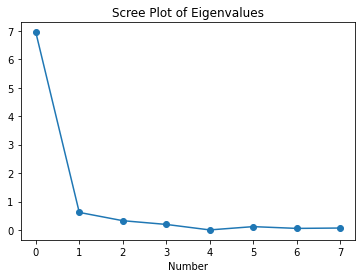

In [10]:
scree_plot(eigenValues)

### c. Calculate the principal component scores. (Use your answer in (b) for the number of PCs).

In [11]:
pc_score = pc_scores(navy, eigenValues, eigenVectors)
pc_score[["print1"]]

,print1
0,5.491928
1,4.924149
2,3.541986
3,3.840701
4,3.052714
5,2.648156
6,2.418288
7,0.261199
8,0.117994
9,0.620370


### d. Calculate the correlations between the variables and PC scores.

In [12]:
pc1_score = pc_score[["print1"]]
corr_matrix = pd.concat([navy, pc1_score], axis=1, keys= ['pc1_score', 'navy']).corr().loc['navy','pc1_score'].T
corr_matrix

,print1
ADO,-0.963669
MAC,-0.930779
WHR,-0.712319
CUA,-0.823733
WNGS,-0.924516
OBC,-0.973709
RMS,-0.982409
MMH,-0.961863


### e. Is there any evidence that the data do not follow a multivariate normal distribution? Answer this question using PC scores.

In [13]:
# Univariate analyses on PC scores
from scipy.stats import kstest, shapiro, anderson, cramervonmises

x=pc_score["print1"]
m=x.mean()
s=x.std()

print("Shapiro-Wilk:",shapiro(x),"\n")
print("Kolmogoroc-Smirnov:",kstest(x, 'norm', args = (m,s)),"\n")
print("Anderson-Darling:",anderson(x, 'norm'))
print("Cramer-von Mises:",cramervonmises(x, 'norm', args = (m,s)),"\n")

Shapiro-Wilk: ShapiroResult(statistic=0.9071460962295532, pvalue=0.026335882022976875) 

Kolmogoroc-Smirnov: KstestResult(statistic=0.19927007628143245, pvalue=0.239925809351193, statistic_location=-1.227801226994739, statistic_sign=1) 

Anderson-Darling: AndersonResult(statistic=0.927302602507396, critical_values=array([0.514, 0.586, 0.703, 0.82 , 0.975]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]), fit_result=  params: FitParams(loc=3.019806626980426e-16, scale=2.636697933820029)
 success: True
 message: '`anderson` successfully fit the distribution to the data.')
Cramer-von Mises: CramerVonMisesResult(statistic=0.16719470124004318, pvalue=0.3427804517896549) 

